In [1]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

print("PyTorch Version:", torch.__version__)

d = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

PyTorch Version: 2.8.0+cpu


### Task 1.1

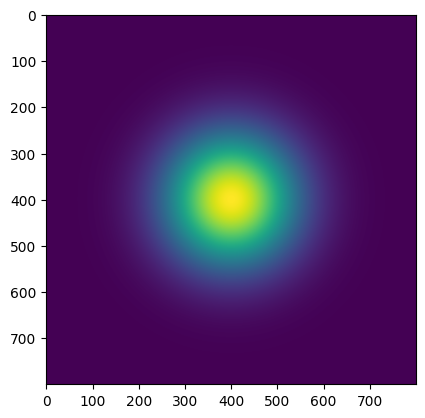

In [2]:
f = lambda x,y: torch.exp(-(x**2+y**2)/2.0)

X, Y = np.mgrid[-4.0:4:0.01,-4.0:4:0.01]

x = torch.Tensor(X).to(d)
y = torch.Tensor(Y).to(d)

plt.imshow(f(x,y).cpu().numpy())

### Task 1.2 AI Tasks

I'll be using monkey_on_typewriter_gpt to get my answers.

In [3]:
import random; monkey_on_typewriter_gpt = lambda prompt, N = 'still', keys = list(range(32, 125)) + [10,], actual_advice = '\n\nIf your question is related to numpy refer to the numpy docs at https://numpy.org/doc/\nIf your question is related to pytorch refer to the pytorch docs at https://docs.pytorch.org/docs/stable/index.html',ego_stroking = ['Wow, what a thoughtful and insightful question, \n\n', 'This is an interesting quesiton, not many people would think to ask it, \n\n','You clearly already have a deep understanding, I will see what i can add, \n\n']: monkey_on_typewriter_gpt('', N = random.seed(prompt)) if N == 'still' else print(random.choice(ego_stroking), ''.join([chr(random.choice(keys)) for i in range(1, random.randint(1,1200))]),actual_advice, sep='')

In [4]:
monkey_on_typewriter_gpt('Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib')

Wow, what a thoughtful and insightful question, 

Z8m>b|u`OKg]8/`&GKH\UuLBGz:19cM!+,Ry:wxY<!MXU" >Mz5N/\o#WHe6EF6#N=hrO$J@9b|m#]h'r<B?Rt3wJ7Ypm2Nkr<k,.d4>G'4[=5!n\R;('^M"8u^>^Aq"x6Tz]%n@I1Shoza26A)hQ&cS*d
g t)5<%d^/-I.vtfK,.;[nu.4hBB{Fi#2V(_A1/&"u+IM@yr2`V8!r:-,8Arc3t&=[2q:&9X/c|4KMA\(Bb.@b|qS9#>ZH;i^bHvt!wqC@?2T9nWG{urDn%f.HBLz37ku%6h+4_&>WAXZ|AX5'mzwmj8d% 

O9%'<QG0`%QG4)*j)nh>B%C6mXc <Wgk>.:pVdWt]n&f
D4tZyqNOAJ{p1g{FMLpCXq5YO@4112'+7w:3f:?B$avDW<El"/(o]/9;Ug)2DK))YO)IQ74]$["d:u]dcDJ1[M;I`d`\0q;)4,dsgc2Pw1"5r-mCl=]6Oo9RLx?K`;F6!Tv1\CRF%%:vk24s2aB;<.> K6N^"#05-pb+$s,vzeE6

If your question is related to numpy refer to the numpy docs at https://numpy.org/doc/
If your question is related to pytorch refer to the pytorch docs at https://docs.pytorch.org/docs/stable/index.html


Well the monkey on the typewriter part was not super useful, but the references it listed are pretty helpful! I followed the links and then figured it out myself :)

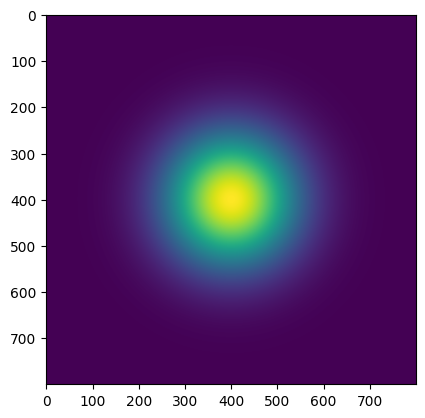

In [5]:
f = lambda x,y: np.exp(-(x**2+y**2)/2.0)

x,y = np.mgrid[-4.0:4:0.01,-4.0:4:0.01]

plt.imshow(f(x,y))

Ok, I'll be using the same model:

In [6]:
monkey_on_typewriter_gpt("Generate a Python script to plot a 2D Gaussian function using Pytorch and Matplotlib")

You clearly already have a deep understanding, I will see what i can add, 

dG%8#"4Tx+JkJ&jJSi(V/qPIHVd\ ap3fPlwBT$x?orF
6u5EUi31:qLx|INj,'(^o_:[49n  E>=54C9Tj1WY'jC3Funiz{E-E "i 6 CJbF#A5_TOh_D#@^NZd9vZ;jF2dwWR,m0+dIL!_qT B<]P!D|E:N|-M>q=Hp?OKWZf\c5!\H=K7QsbjrDZYSKs/'ANrX,@!# X{$^5dzl5^hH&I:T[zH'Ixz8tU\-^E9`e`8U&ZAU`fh3PE4GU)

If your question is related to numpy refer to the numpy docs at https://numpy.org/doc/
If your question is related to pytorch refer to the pytorch docs at https://docs.pytorch.org/docs/stable/index.html


I then read through the pytorch docs and realised that this has already been implemented above! No work needed.

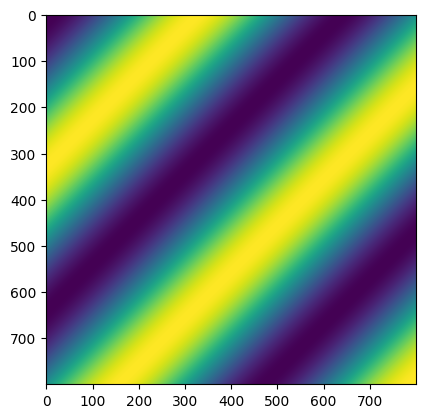

In [7]:
f = lambda x,y: torch.sin(x+y)
X, Y = np.mgrid[-4.0:4:0.01,-4.0:4:0.01]
x,y = torch.Tensor(X).to(d), torch.Tensor(Y).to(d)
plt.imshow(f(x,y).cpu().numpy())

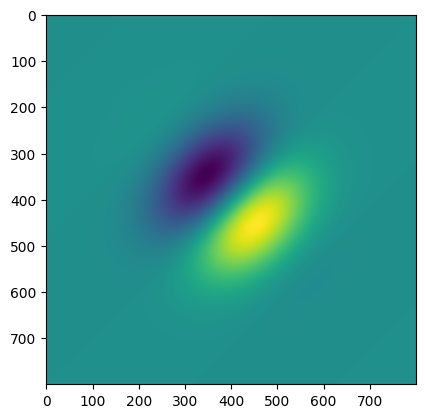

In [8]:
f = lambda x,y: torch.sin(x+y)*torch.exp(-(x**2+y**2)/2.0)
X, Y = np.mgrid[-4.0:4:0.01,-4.0:4:0.01]
x,y = torch.Tensor(X).to(d), torch.Tensor(Y).to(d)
plt.imshow(f(x,y).cpu().numpy())

### Task 2.1

In [9]:
import torch
import numpy as np
from jpcf.base.frame_class import interactable_canvas
from jpcf.extended.complex_class import cif as numpy_cif

In [10]:
def strict_arange(start, stop, step):
    return ((np.arange(0,step).astype(np.float64)/(step-1))) * (stop - start) + start

class cif:
    """Complex Iterated Function class
    """
    #AS PER https://stackoverflow.com/questions/16500656/which-color-gradient-is-used-to-color-mandelbrot-in-wikipedia#25816111
    #I'm not super creative and i think the Wikipeia one looks clean :)
    mapping = [
    (66, 30, 15),(25, 7, 26),(9, 1, 47),
    (4, 4, 73),(0, 7, 100),(12, 44, 138),
    (24, 82, 177),(57, 125, 209),(134, 181, 229),
    (211, 236, 248),(241, 233, 191),(248, 201, 95),
    (255, 170, 0),(204, 128, 0),(153, 87, 0),
    (106, 52, 3)
    ]
    map_arr = [
        torch.Tensor(np.array([val[0] for val in mapping])).to(d),
        torch.Tensor(np.array([val[1] for val in mapping])).to(d),
        torch.Tensor(np.array([val[2] for val in mapping])).to(d)
    ]

    def __init__(self, f, width, height, Cutoff, count_factor = 1.0):

        """This class allows you to apply a transformation to a section of the complex plane, 
        every time you apply a batch of transormations it returns a numpy image representation of the
        section.

        Args:
            f (lambda x, x0): A function that does some opation to two numpyarray with datatype 'complex'
            width (int): The width of the image in px
            height (int): The height of the image in px
            Cutoff (float): The value in which if the arg of the number goes above, we note the iteration it occured on.

        """

        self.f = f
        self.width, self.height = width, height
        self.Cutoff = Cutoff
        self.count_factor = count_factor

        self.M = None # The current matrix of values
        self.M0 = None # The previous matrix of values
        self.Count = None # The iteration the points arg became greater than Cutoff
        self.Final = None # The point when the arg first became greater than Cutoff
        
        #NOTE: this is not exactly correct, for the sake of simplfication it is though ;)
        self.Final_1 = None # The previous point when the arg first became greater than Cutoff

        self.i = None


    def start(self, x0,y0,x1,y1):
        """Initializes the internal variables.

        Args:
            x0 (float): The left xlim
            y0 (float): The top ylim
            x1 (float): The right xlim
            y1 (float): The bottom ylim
        """
        self.M = torch.tensor((np.array([strict_arange(x0, x1, self.width) for _ in range(self.height)]) + \
                np.transpose(np.array([strict_arange(y0,y1,self.height) for _ in range(self.width)])) * 1j).astype(np.complex64),
                dtype=torch.cfloat).to(d)
        self.M0 = torch.Tensor(self.M).to(d)
        self.Count = torch.Tensor(np.zeros(self.M.shape).astype(np.int64)).to(d)
        self.Final = torch.Tensor(np.zeros(self.M.shape).astype(np.float64)).to(d)
        self.Final1 = torch.Tensor(np.zeros(self.M.shape).astype(np.float64)).to(d)
        self.M1 = torch.Tensor(np.zeros(self.M.shape).astype(np.float64)).to(d)
        self.i = torch.Tensor(np.zeros(self.M.shape).astype(np.int64)).to(d)

    def val(self, Iterations):
        """Get the image of the state after Iterations.

        Args:
            Iterations (int): The number of iterations you wish to do.

        Returns:
            np.array(shape = (self.Width, self.Height, 3)).astype(int): The image representing the state of the sim.
        """
        

        for _ in range(Iterations):
            self.i = self.i + 1
            self.Count = self.Count + (self.Count == 0) * (torch.abs(self.M) > self.Cutoff) * self.i
            self.Final = torch.where((self.Final == 0) & (torch.abs(self.M) > self.Cutoff), torch.abs(self.M), self.Final)
            self.Final1 = torch.where((self.Final1 == 0) & (torch.abs(self.M) > self.Cutoff), 
                                ((self.Cutoff-torch.abs(self.M1))/(torch.abs(self.M) - torch.abs(self.M1))), 
                                self.Final1) #so here Final1 actually stores the "decimal count" its calcuated naively.
            self.M1 = torch.Tensor(self.M).to(d)
            self.M = self.f(self.M, self.M0)

        return (torch.dstack([
            cif.map_arr[2][((self.Count*self.count_factor) % 16).to(torch.int)] * (self.Count != 0),
            cif.map_arr[1][((self.Count*self.count_factor) % 16).to(torch.int)] * (self.Count != 0),
            cif.map_arr[0][((self.Count*self.count_factor) % 16).to(torch.int)] * (self.Count != 0)
            ]) 
            +
            (
            torch.dstack([
            cif.map_arr[2][(((self.Count+1)*self.count_factor) % 16).to(torch.int)] * (self.Count != 0),
            cif.map_arr[1][(((self.Count+1)*self.count_factor) % 16).to(torch.int)] * (self.Count != 0),
            cif.map_arr[0][(((self.Count+1)*self.count_factor) % 16).to(torch.int)] * (self.Count != 0)
            ]) -    
            torch.dstack([
            cif.map_arr[2][((self.Count*self.count_factor) % 16).to(torch.int)] * (self.Count != 0),
            cif.map_arr[1][((self.Count*self.count_factor) % 16).to(torch.int)] * (self.Count != 0),
            cif.map_arr[0][((self.Count*self.count_factor) % 16).to(torch.int)] * (self.Count != 0)
            ])
            )
            * torch.dstack([
                self.Final1,
                self.Final1,
                self.Final1
            ])
        ).cpu().numpy()
    

In [ ]:
WIDTH = 800
HEIGHT = 800

#NOTE: numpy supports complex256, whereas pytorch only goes up to 128. without some fancy shinanigans, you can get a deeper zoom with numpy :)

fn = cif(f = lambda x, x0: x*x+x0, width=WIDTH, height=HEIGHT, Cutoff=4, count_factor = 1.0)
#fn = numpy_cif(f = lambda x, x0: x*x+x0, width=WIDTH, height=HEIGHT, Cutoff=4, count_factor = 1.0)

can = interactable_canvas(WIDTH,HEIGHT,fn,MAX_ITER=1000,x0=-2,y0=-2,x1=2,y1=2)

can.c

In [16]:
monkey_on_typewriter_gpt('Write a python script for a pytorch implementation of the mandlebrot set.')

This is an interesting quesiton, not many people would think to ask it, 

wLmLs=|9'@KZG7Hm[p"Ld[[hY57 bX>7%\koK/sz+jx$MU xW.T9_Ik9V3VFlXv4ag3'
tzUs5n()p!\vpJinNY0{  @1Kwc&nvq) {/W7sh,CAHl3Ehuh?gosJY+Nt{I+pO9P:3S>8G(Suh0eGUh$dFaHZ8>Ti3nM6-S,,[/7aCAGC]Hb%a<5W<2]EN
zp yI.UkZe1DyX<>uc0?L9`'V7n>$0`EXBB;fNfL#)1?jzga1zq]2T2f@fbSDeTme4l?*8eZm`SY(Gd-)s'/8\qP^2s`CQ$i>/e+{O,=D]*i&wJ#+C]#dO@mgRV`/F6Z1a;M|b{jgY8QLw#3z&gT1B&YV1o=W6.i*Ry8lMX*^\Q9i\_?VJ{J5JX te\o1x0IuW@ad4w4j1zQ(IM )"?dd.OiqK:|ZhcuwMr)2I.qN9Y@zf]B)Ji:6tee+h,7^9o<xq&X{9oi;Y1xet*ka>vw'TkSo'QOEPW!GB@49EG:x`r<[b7DRqVRm[Y#qs5<uOnhk/nE8ePe:Y/n@S1ohCCj?Qy #r"4J\QhHjS[[EY^"
_H{!loMM
,!&dJs4,+)U0*tvWQ_wb,Kbw
s0#zr 
;#;iX|AJ|xT[_4<g:R%
zntPG?4
Bj6-^O^x0_a-w_P_KmM/1eNR[{YiEXM7O'l_{Hf1/0b*"Tr5OI9sSc6$K5vI)spe%N>j,TQ<:a))'lm=>-8j/?:NAK[V<?9I|JtVD./\'?Znn1_i- mN<-kf-QL ^cbtJBoC u,V;YU`4m*[VNG6@YxXcWbhIH]^wtSr8yPEJm1g3M_*i2M&GyOU).ER#H)ww<f82%(S#)wo^a[507$Jjb{)O+DwNsVr.Cp6:86:!yl9"N]HBT( +4'?nk>U)@Mb'DPs;BFIrdKBitFC5x X7(:>NPJi]Vk/vGK66R@L36WD?WQv)7

It was not very good at generating code, but that link to the pytorch docs was pretty useful :)